In [385]:
# Importing Libraries
import os
import warnings
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

# Ignore Warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

# Setting Random Seed
np.random.seed(108)


<h1 align="center"><strong>LOAD DATASET</strong> </h1>

In [386]:
# Loading Dataset
data = pd.read_excel('Customer_data.ods')

# Printing number of rows in the dataset
print("Number of Rows:", len(data))

Number of Rows: 10000


<h1 align="center"><strong>DATA EXPLORATION</strong> </h1>

**This section will look at the following:**
- First few rows of the dataset
- Summary Statistics
- Data Types of Attributes <br>


**The dataset consists of 10,000 datapoints and 20 attributes.** <br>
Categorization can be achieved in the following subsets:


**Customer's Information:**
- Consumer_ID
- Gender
- has_gender 
- has_first_name 
- has_last_name
- has_email
- has_dob
- customer_age

**Account Information:**
- account_age 
- account_last_updated
- account_status
- app_downloads

**Promotions**
- unique_offer_clicked
- total_offer_clicks
- unique_offer_impressions
- total_offer_impressions
- avg_redemptions
- min_redemptions
- max_redemptions
- total_offers_redeemed

In [387]:
# Displaying first few rows of the dataset
data.head()

,consumer_id,gender,has_gender,has_first_name,has_last_name,has_email,has_dob,customer_age,account_age,account_last_updated,account_status,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_impressions,total_offer_impressions,avg_redemptions,min_redemptions,max_redemptions,total_offers_redeemed
0,1284b75c-ecae-4015-8e3d-359c0347ede8,NaN,0,1,1,1,0,NaN,188,174,0,1,3,3,8,52,1.0,1,1,1
1,128af162-d2c3-4fe4-986c-359c8bdc6c04,NaN,0,1,1,1,0,NaN,185,174,0,1,3,8,5,58,1.0,1,1,1
2,12aada5e-36eb-4e9e-8d62-359c076c1b40,NaN,0,1,1,1,0,NaN,188,174,0,1,3,4,9,183,1.0,1,1,3
3,12c2e02f-bc79-4048-83ba-359cd3280dcf,NaN,0,1,1,1,0,NaN,184,174,0,1,3,7,4,56,1.0,1,1,1
4,12fabdf0-0582-489e-a6d3-35509ab8ae6f,f,1,1,1,1,1,22.0,572,173,0,1,4,6,7,83,1.0,1,1,3


In [388]:
# Describing features
data.describe()

,has_gender,has_first_name,has_last_name,has_email,has_dob,customer_age,account_age,account_last_updated,account_status,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_impressions,total_offer_impressions,avg_redemptions,min_redemptions,max_redemptions,total_offers_redeemed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,4064.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.547800,0.998000,0.995900,0.999200,0.406400,22.980807,245.816600,174.256700,0.0,1.032200,3.172400,5.825600,7.516500,68.429900,1.003003,1.001300,1.005700,1.880900
std,0.497735,0.044679,0.063903,0.028274,0.491185,8.504064,130.090693,0.895145,0.0,0.186994,2.059831,5.290424,3.490264,69.591347,0.046453,0.036034,0.079172,1.187121
min,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,174.000000,173.000000,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,184.000000,174.000000,0.0,1.000000,2.000000,2.000000,4.000000,23.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,187.000000,174.000000,0.0,1.000000,3.000000,4.000000,7.000000,47.000000,1.000000,1.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,193.000000,174.000000,0.0,1.000000,4.000000,8.000000,10.000000,90.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,119.000000,649.000000,187.000000,0.0,5.000000,14.000000,62.000000,25.000000,1693.000000,2.500000,2.000000,4.000000,11.000000


In [389]:
# Feature Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   consumer_id               10000 non-null  object 
 1   gender                    5478 non-null   object 
 2   has_gender                10000 non-null  int64  
 3   has_first_name            10000 non-null  int64  
 4   has_last_name             10000 non-null  int64  
 5   has_email                 10000 non-null  int64  
 6   has_dob                   10000 non-null  int64  
 7   customer_age              4064 non-null   float64
 8   account_age               10000 non-null  int64  
 9   account_last_updated      10000 non-null  int64  
 10  account_status            10000 non-null  int64  
 11  app_downloads             10000 non-null  int64  
 12  unique_offer_clicked      10000 non-null  int64  
 13  total_offer_clicks        10000 non-null  int64  
 14  unique_

**From the above table we can conclude the following:**

1. There are missing values in 'gender' and 'customer_age'.
2. There are categorical features in the dataset (dtype: object). We will encode them into numerica form. <br>


<h2 align="center"><strong>DATA PREPROCESSING</strong> </h2>

**This section will look at the following:**

- Handle missing values
- Remove redundant attributes
- Detect and handle Outliers
- Look at Correlation Matrix among regressors
- Encode categorical attributes
- Scale / Normalize attributes

**Gender and Customer's Age are important for inference. They are crucial in connecting predictions to consumer attributes.**<br>
Therefore we will drop rows that are missing those attributes.

In [390]:
# Removing rows with atleast one NA
df = data.dropna()
print("The total number of rows after removing missing values are:", len(df))

The total number of rows after removing missing values are: 3878


In [391]:
# Verifying the distribution of Gender in the dataset, after removing NA's
print("Gender Distribution in the Dataset:", df.gender.value_counts(), "\n")

# Cleaning gender acronyms for a clearer representation
df['gender'] = df['gender'].replace({"f": 'Female', "m": 'Male'})
print("Cleaner represetation of Gender acronyms in Dataset:", df.gender.value_counts())


Gender Distribution in the Dataset: gender
m    2017
f    1861
Name: count, dtype: int64 

Cleaner represetation of Gender acronyms in Dataset: gender
Male      2017
Female    1861
Name: count, dtype: int64


**Much cleaner**. Now, there are some attributes that will not help in clustering, describing or inferencing our data. Removing those attributes below:

<h3 align="center"><strong>REDUNDANT FEATURES</strong> </h3>

In [392]:
# Removing redundant features
to_remove = ['consumer_id', 'has_gender', 'has_first_name', 'has_last_name', 'has_email', 'has_dob', 'account_status']
df = df.drop(to_remove, axis=1)

In [393]:
# Detailed description of numerical features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,3878.0,22.972408,8.590054,15.0,19.0,20.0,24.0,119.0
account_age,3878.0,264.363847,145.856739,174.0,184.0,188.0,277.0,649.0
account_last_updated,3878.0,174.223827,0.875205,173.0,174.0,174.0,174.0,187.0
app_downloads,3878.0,1.030944,0.179046,1.0,1.0,1.0,1.0,4.0
unique_offer_clicked,3878.0,3.363589,2.129502,1.0,2.0,3.0,4.0,14.0
total_offer_clicks,3878.0,6.315627,5.560641,1.0,2.0,5.0,8.0,62.0
unique_offer_impressions,3878.0,7.919030,3.573993,1.0,4.0,8.0,10.0,24.0
total_offer_impressions,3878.0,74.629706,70.714231,2.0,28.0,54.0,96.0,657.0
avg_redemptions,3878.0,1.003679,0.052097,1.0,1.0,1.0,1.0,2.5
min_redemptions,3878.0,1.001289,0.035889,1.0,1.0,1.0,1.0,2.0


<h3 align="center"><strong>OUTLIER DETECTION</strong> </h3>

**From the table above, there is an unusual jump between the 75th percentile and MAX value of the following attributes:**
- customer_age
- account_age
- total_offer_clicks
- total_offer_impressions

Investigating by plotting density of those attributes. 

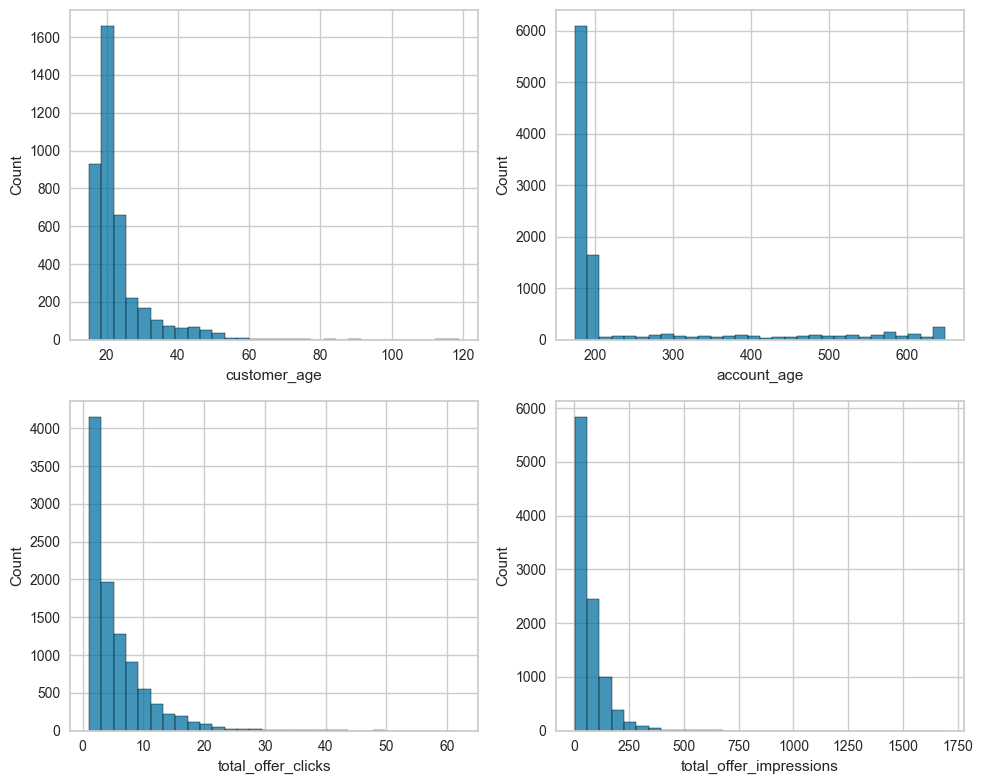

In [394]:
# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data.customer_age, bins=30, ax=axes[0, 0])
sns.histplot(data.account_age, bins=30, ax=axes[0, 1])
sns.histplot(data.total_offer_clicks, bins=30, ax=axes[1, 0])
sns.histplot(data.total_offer_impressions, bins=30, ax=axes[1, 1])

plt.tight_layout()
plt.show()


**Further analysis is needed to understand if the attributes have outliers.**<br>
- Plotting selected variables to guage a high-level relationship between attributes.
- Understanding if a data point(s) is an Outlier, High Leverage **OR** Highly Influencial.

<Figure size 800x550 with 0 Axes>

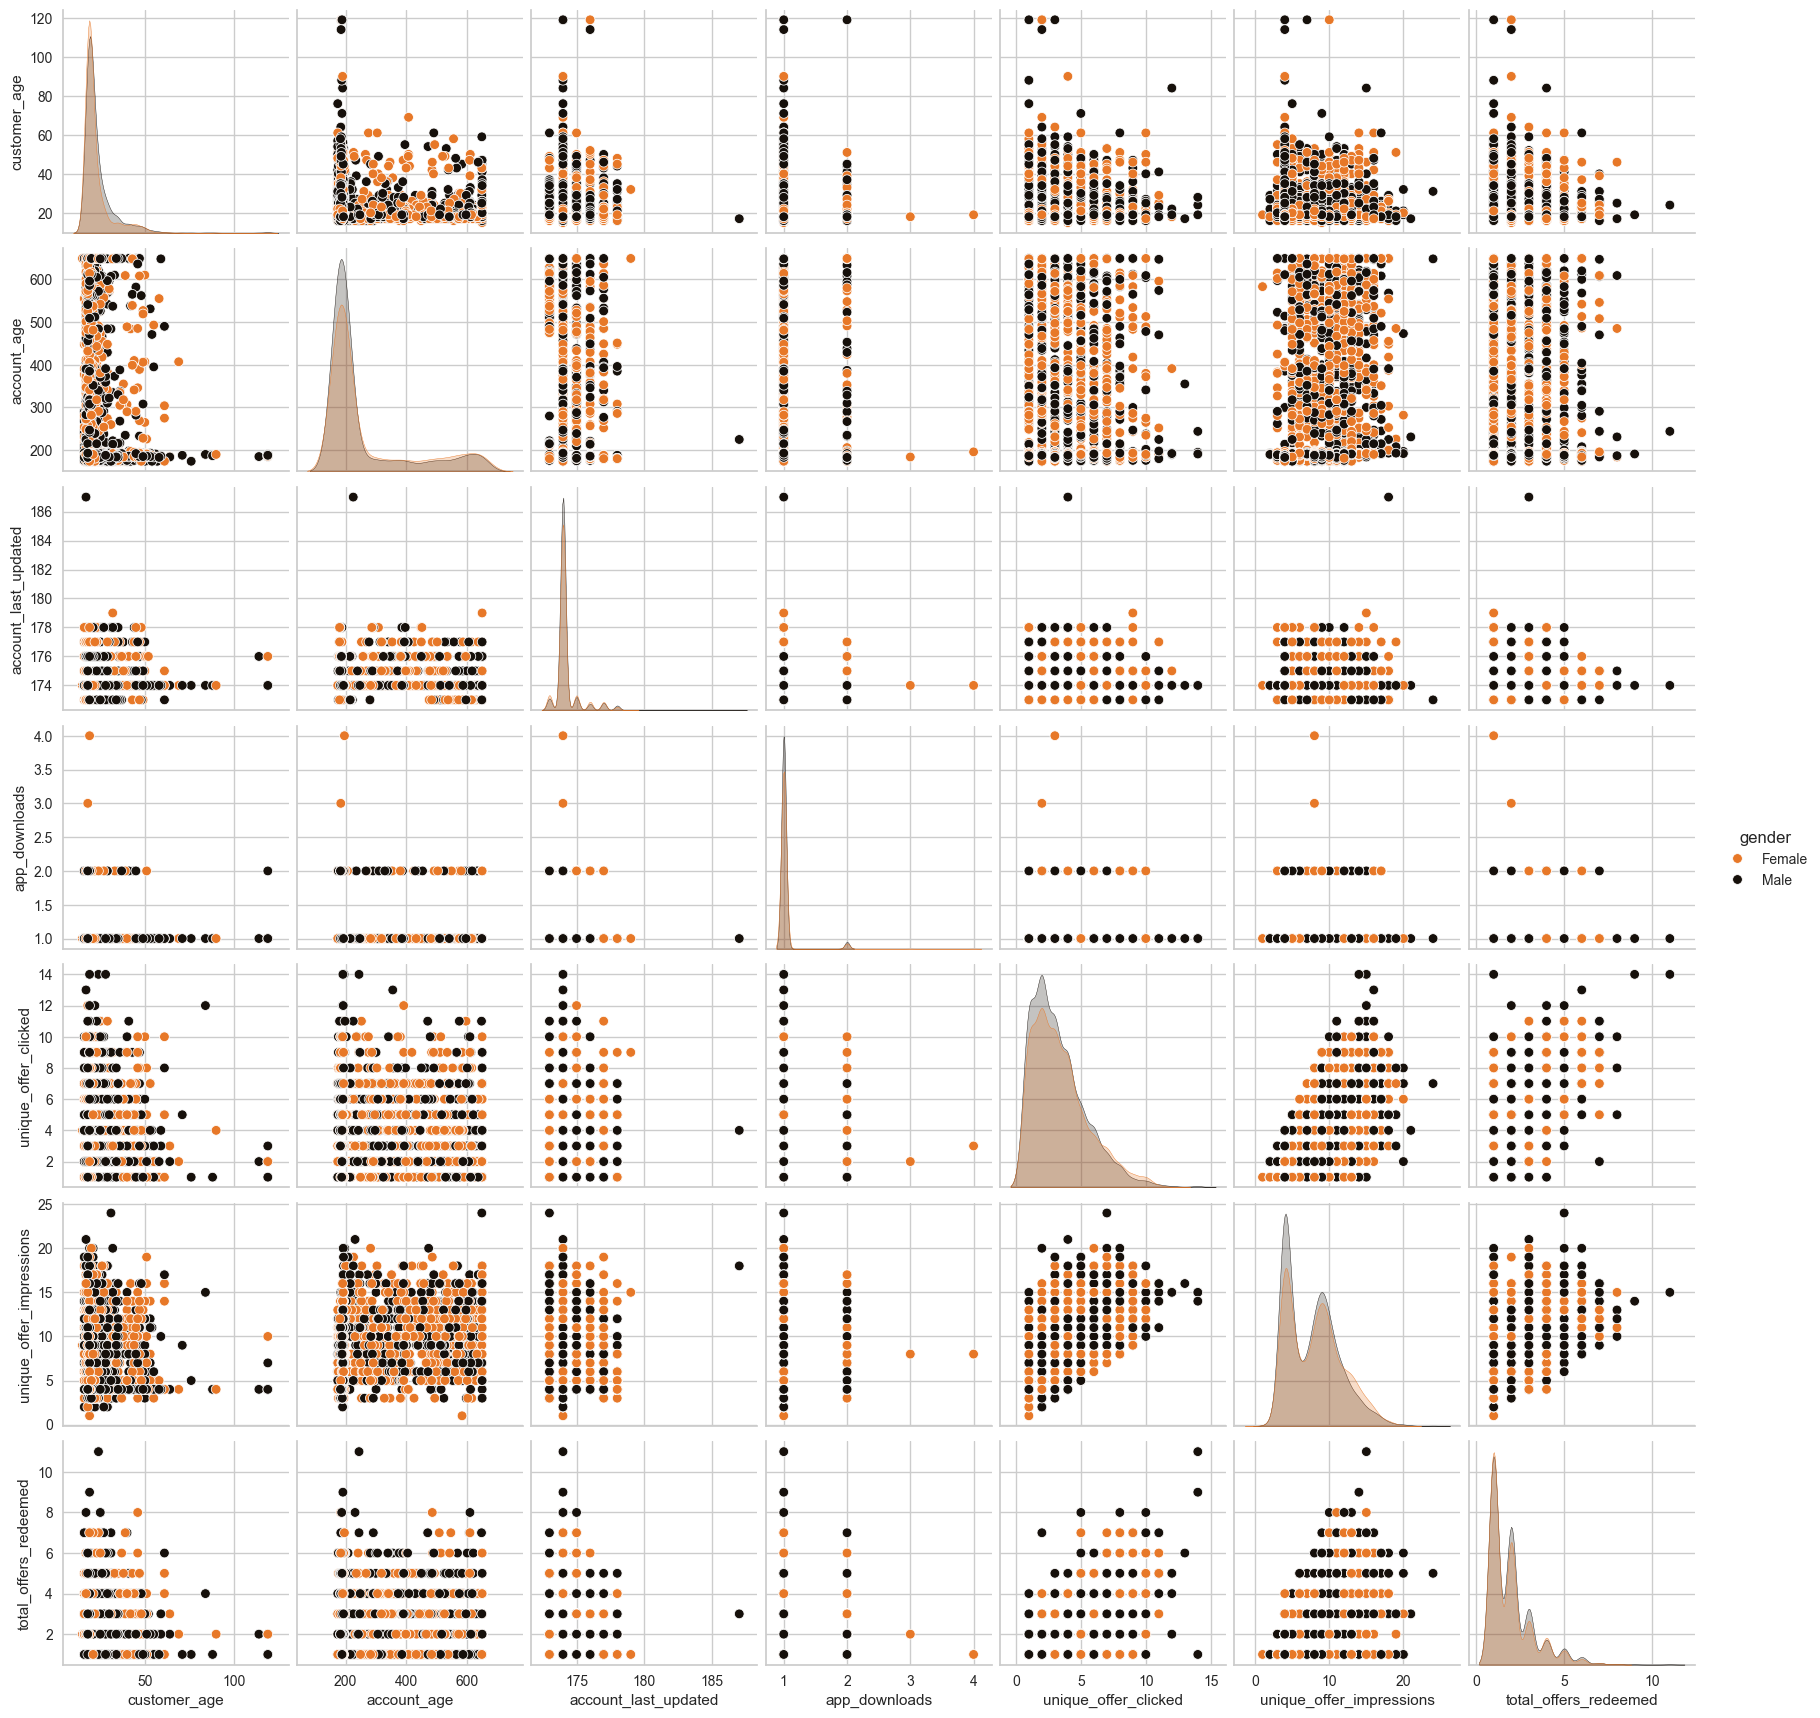

In [395]:
# Pairs Plot of selected features
features = ['customer_age', 'account_age', 'account_last_updated', 'app_downloads',
            'unique_offer_clicked', 'unique_offer_impressions', 'total_offers_redeemed',
            'gender']

plt.figure()
sns.pairplot(df[features], hue="gender", palette=(['#e77828', '#16100b']))
plt.show()



**Outliers qualify the following criteria:**
- Large error terms. Value of those points is unusual and does not fit the distribution, leading to large error.
- High Leverage - Observation has a potential to influence the fitted line/model/distribution.
- High Influence - Combination of both.<br>

From the pairs plot above, following points fit the criteria's mentioned above:

1. customer_age > 60 **and** unique_offer_clicked > 11
2. account_last_updated > 185
3. unique_offer_impressions > 22


In [396]:
# Dropping the above identified outliers from the dataset.
i = df.loc[(df.unique_offer_clicked > 11) & (df.customer_age > 60)].index[0]
df.drop(i, inplace=True)

df = df[df.account_last_updated <= 185]
df = df[df.unique_offer_impressions <= 22]

print("Number of rows after removing outliers: ", len(df))

Number of rows after removing outliers:  3875


<h3 align="center"><strong>CORRELATION MATRIX</strong> </h3>

<Axes: >

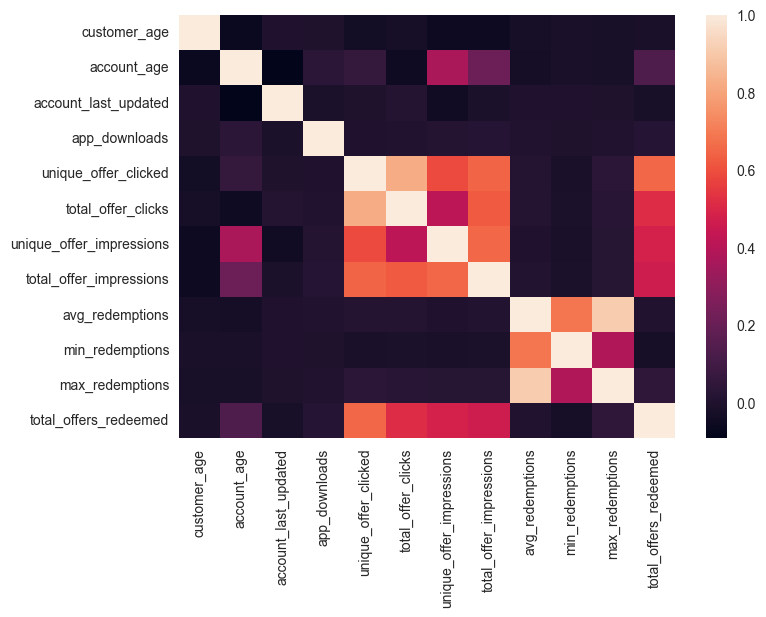

In [397]:
# Verifying high correlations between attributes
corrmat = df[df.columns[1:]].corr()
sns.heatmap(corrmat)

**Correlations does not seem to be problematic.** Moving over to Scaling the attributes. 

<h3 align="center"><strong>ENCODE CATEGORICAL ATTRIBUTE</strong> </h3>

In [398]:
# Initialising Label Encoder & converting Gender variable into factor.
labelencoder = LabelEncoder()
df["gender"] = labelencoder.fit_transform(df['gender'])

print('Categorical variable "Gender" has been converted to Factor')

Categorical variable "Gender" has been converted to Factor


<h3 align="center"><strong>SCALE ATTRIBUTES</strong> </h3>

In [399]:
# Creatin a copy of data before scaling attributes
ds = df.copy()

# Deleting columns that will not participate in the model
del_cols = ['account_age', 'avg_redemptions', 'min_redemptions', 'max_redemptions']
ds = ds.drop(del_cols, axis=1)

# Scaling Dataset
scaler = StandardScaler()
scaler.fit(ds)
scaled_df = pd.DataFrame(scaler.transform(ds), columns = ds.columns)

print("Dataset has beenn scaled")


Dataset has beenn scaled


In [400]:
# Scaled dataset that will be used for PCA Dimension reduction
scaled_df.head()

,gender,customer_age,account_last_updated,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_impressions,total_offer_impressions,total_offers_redeemed
0,-1.040295,-0.112029,-1.435020,-0.172917,0.301098,-0.055160,-0.255740,0.121215,0.844450
1,-1.040295,-0.697878,-0.259644,-0.172917,-1.110867,-0.957808,-1.098422,-0.744960,0.042233
2,-1.040295,-0.346369,2.091107,-0.172917,-0.640212,-0.596749,0.867835,-0.176976,-0.759985
3,-1.040295,-0.580708,-0.259644,-0.172917,-0.169557,0.125369,-0.536634,-0.432569,0.042233
4,0.961266,-0.580708,-0.259644,-0.172917,-0.169557,-0.596749,1.148729,-0.389970,0.042233


<h2 align="center"><strong>MODEL SELECTION</strong> </h2>

**This section will look at the following:**

Customer segmentation will be performed by dimensionality reduction through PCA.
- Principal Component Analysis (PCA) - reduces dimensionality for increased interpretability at the same time minimising information loss.
- 3D Interpretation of reduced dimensions
- Elbow Method to determine Cluster size


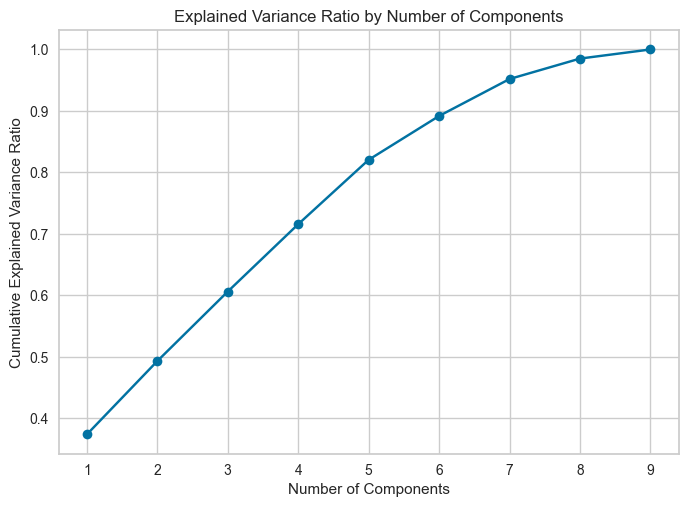

In [401]:
# Initialising PCA and plotting explained variance with number of PCA components.
pca = PCA()
pca.fit(scaled_df)  # X is your data matrix
explained_variance_ratio = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

Seven components explain a significant portion of variance (95%), the original dimension of the dataset is nine. After iterative testing, I decided to use three as the number of components because the resulting performance was identical to seven and dimensions were significatly reduced.

In [402]:
# Initialising PCA and reduce dimensions to 3
pca = PCA(n_components= 3)
pca.fit(scaled_df)

# Describing the dimestions
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(['col1', 'col2', 'col3']))
PCA_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
col1,3875.0,-4.034049e-17,1.834194,-2.499808,-1.382641,-0.455464,0.921618,9.962782
col2,3875.0,1.833659e-17,1.036588,-1.929978,-0.979495,0.231219,0.640270,7.843550
col3,3875.0,1.650293e-17,1.008993,-4.495924,-0.050928,0.091331,0.167384,11.194711


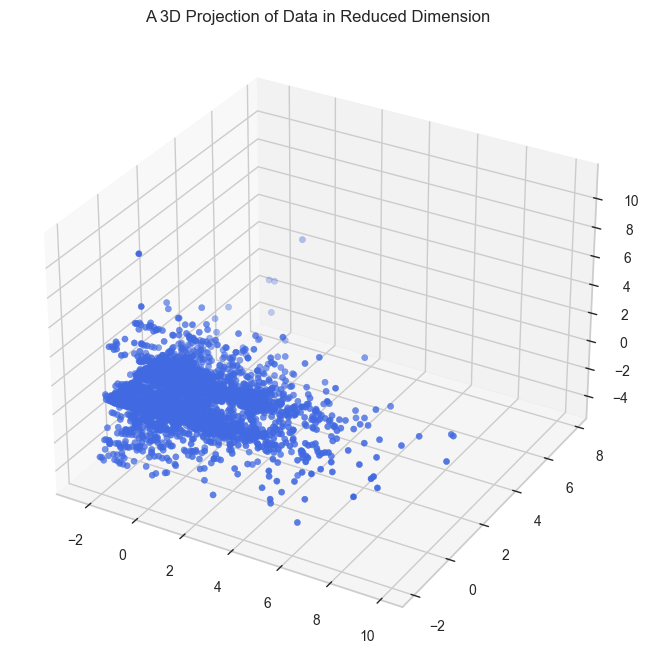

In [403]:
# 3D Projection of Dimensionality Reduction
x = PCA_df.col1
y = PCA_df.col2
z = PCA_df.col3

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, c="royalblue", marker='o')
ax.set_title("A 3D Projection of Data in Reduced Dimension")
plt.show()

Elbow method to determine the number of ideal number of clusters


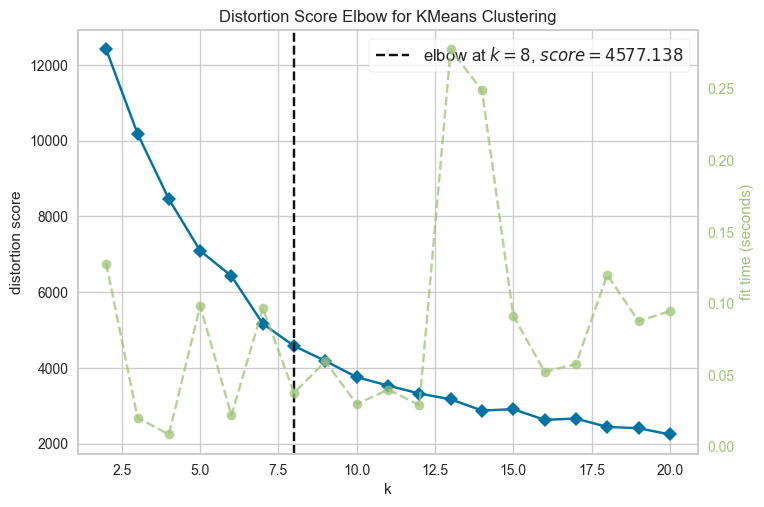

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [404]:
# Elbow method with K-Means Clustering to determine the ideal number of clusters to use.
print("Elbow method to determine the number of ideal number of clusters")
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(PCA_df)
Elbow_M.show()

**The above result indicates that seven should be the optimal number of clusters. After testing I decided that three clusters seem to be more than sufficient in describing the data.**<br>
Now we will fit the Algglomerative Clustering Model to get the final clusters.

In [405]:
# Initializating Agglomerative Clustering Model
AC = AgglomerativeClustering(n_clusters=3)

# Fitting scaled dataset to model and predicting clusters.
yhat_AC = AC.fit_predict(scaled_df)
PCA_df.Clusters = yhat_AC

# Storing result into original dataframe for analysis and visualization.
df.Clusters = yhat_AC

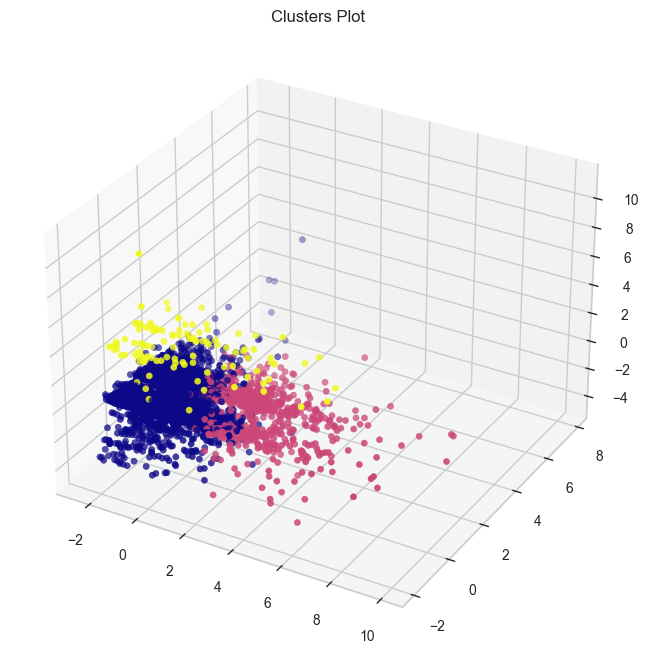

In [406]:
# Ploting Clusters
cmap = plt.cm.get_cmap('plasma')

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, c=PCA_df.Clusters, marker='o',  cmap=cmap)
ax.set_title("Clusters Plot")
plt.show()

<h2 align="center"><strong>MODEL EVALUATION</strong> </h2>

For unsupervised clustering, we do not have a response value to measure model performance.<br>
**Therefore, we will look at the following:**
- Distribution of Clusters
- Assuming total_offers_redeemed as a ideal response, interpret the clusters perfomance on that response.



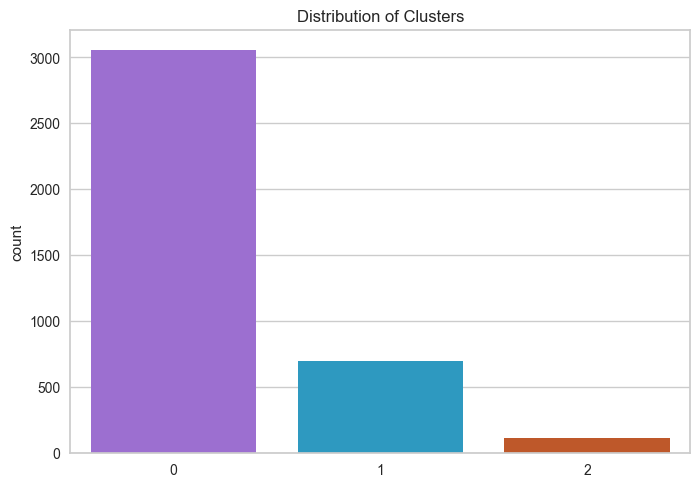

In [407]:
# Plotting Distribution of the final Clusters
colors = (["#9b5fe0", "#16a4d8", "#d64e12", "#60dbe8", "#8bd346", "#efdf48", "#f9a52c"])
pl = sns.countplot(x=df.Clusters, palette=colors)
pl.set_title("Distribution of Clusters")
plt.show()

Distribtution shows majority of customer's were classified into the first Cluster, indicating a specific profile for those customers.

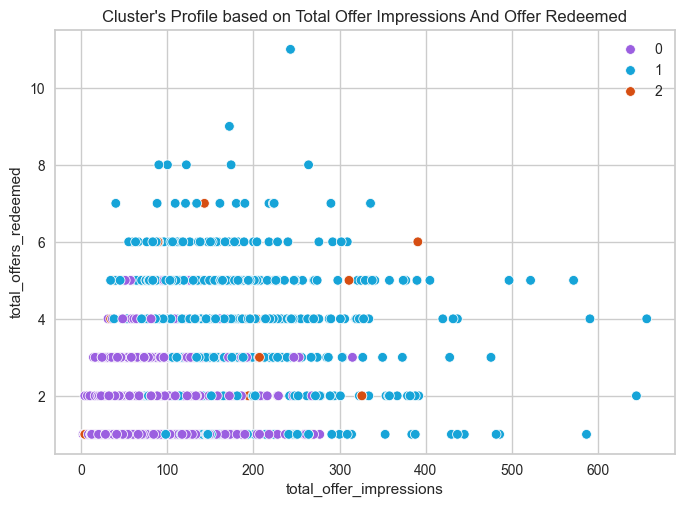

In [408]:
# Plotting Total Offer Impressions against Total Offers Redeemed - for each Cluster
p = sns.scatterplot(data=df, y = df.total_offers_redeemed, x = df.total_offer_impressions, hue = df.Clusters,
                     palette=colors)
p.set_title("Cluster's Profile based on Total Offer Impressions And Offer Redeemed")
plt.legend()
plt.show()


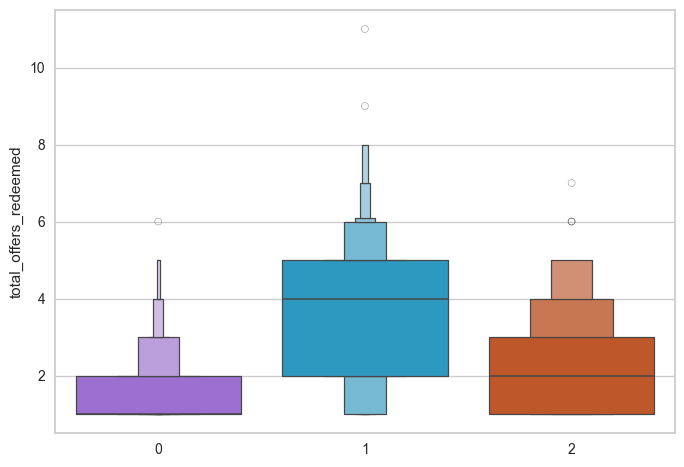

In [409]:
# Plotting distribution of Total Offers Redeemed in each Cluster
p = sns.boxenplot(x=df.Clusters, y=df.total_offers_redeemed, palette=colors)
plt.show()


Here we can see that customer's who redeemed the most offers are profiled under Cluster 1.<br>This indicates there is a pattern underneath the attributes that separates customer who would **redeem a large number of offers** from others.

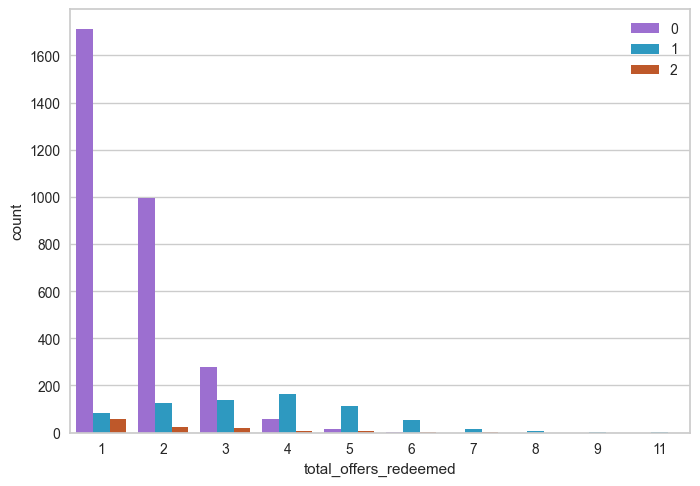

In [410]:
# Distribution of Total Offers Redeemed per Cluster
pl = sns.countplot(x = df.total_offers_redeemed, hue=df.Clusters, palette= colors)
plt.show()

The relationship identified here demonstrates a tendancy to redeem 3-4 offers on average for Cluster 1.<br>
Customers classified in Cluster 0 tend to redeed at most one offer.<br>Cluster 2 follows Cluster 0's behaviour, although no indication of the difference between these two clusters is apparent.

<h2 align="center"><strong>PROFILING</strong> </h2>

**This section will look at the following:**

Now that we have described the Clusters and their relationship with Offers Redeemed. Let us take a look inside and see who belongs in the clusters.<br>
Profiling clusters will tell us who has responded more favourably to the campaign by redeeming the most offers.<br>
It will also highlight potential targets and their behaviour to this specific marketing campaign, helping decision makers decide where to focus our attention the next time around.





<Figure size 800x550 with 0 Axes>

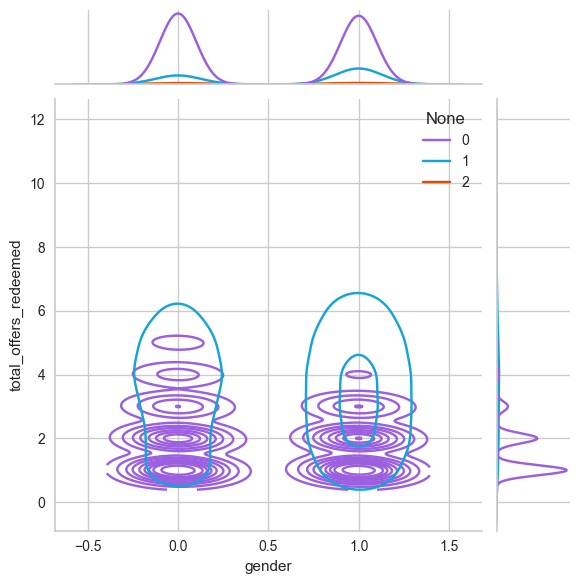

<Figure size 800x550 with 0 Axes>

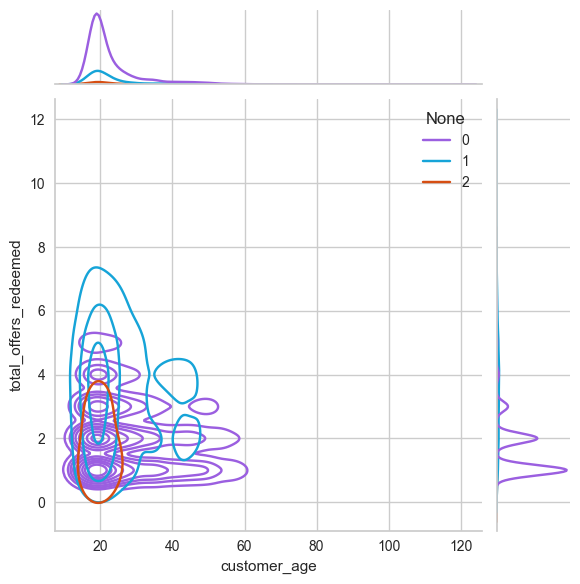

<Figure size 800x550 with 0 Axes>

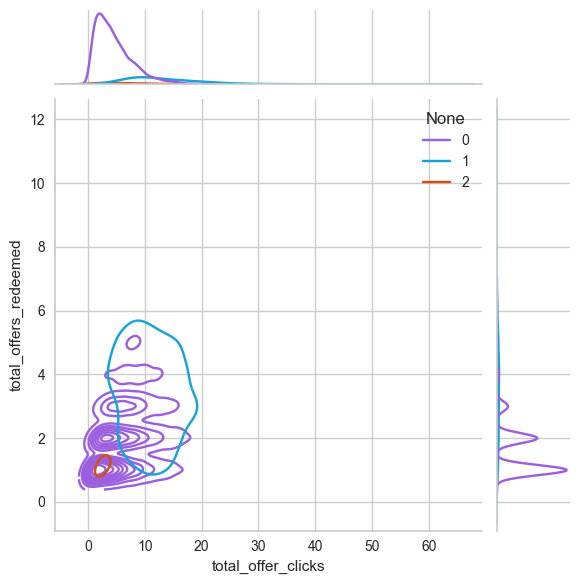

<Figure size 800x550 with 0 Axes>

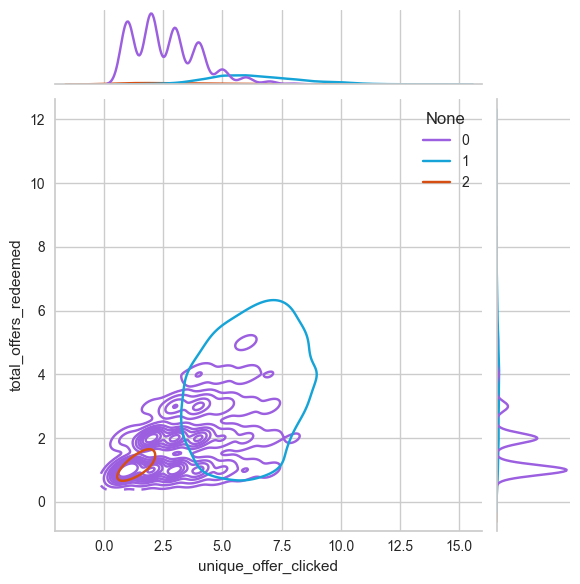

<Figure size 800x550 with 0 Axes>

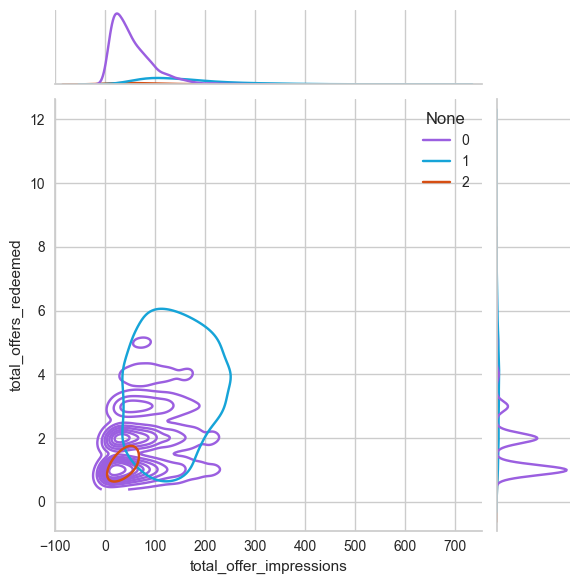

<Figure size 800x550 with 0 Axes>

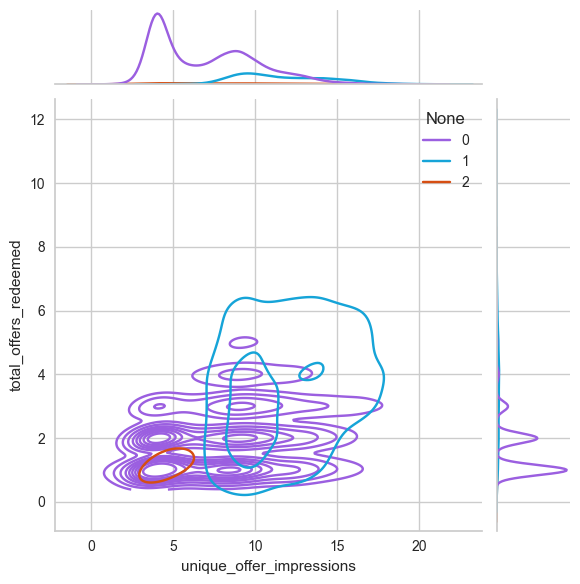

In [411]:
# Ploting attributes that can profile the customer features and their engagement with the campaigh
Attention = ['gender', 'customer_age', 'total_offer_clicks', 'unique_offer_clicked', 'total_offer_impressions', 'unique_offer_impressions']

for i in Attention:
    plt.figure()
    sns.jointplot(x = df[i], y=df.total_offers_redeemed, hue=df.Clusters, kind='kde', palette = colors)
    plt.show()



<h2 align="center"><strong>PROFILING</strong> </h2>

**Cluster Number: 0** <br>
Gender: Equal proportion of Male and Female. <br>
Age: Spread between all age groups. <br>
Unique and Total Offers Clicks: Average number of clicks and redemptions. <br>
Unique and Total Impressions: Average impression count. <br>
Redemptions: Average redeemption comparatively. <br>

**Cluster Number: 1** <br>
Gender: Equal proportion of Male and Female. <br>
Age: Majority between 15-30 years. <br>
Unique & Total Offers Clicks: Clicks at more unique offers than any other Cluster. <br>
Unique & Total Impressions: Most number of Unique and Total Impressions. <br>
Redemptions: Redeems the most number of offers than any other cluster. <br>

**Cluster Number: 2** <br>
Gender: Equal proportion of Male and Female. <br>
Age: Strictly less than 25 years of age. <br>
Unique & Total Offers Clicks: Least number of clicks and redemptions. <br>
Unique & Total Impressions: Least number of Unique and Total Impressions. <br>
Redemptions: Redeems the least number of offers than any other cluster. <br>

<h2 align="center"><strong>CONCLUSION</strong> </h2>

In this case study, I have performed Descriptive, Inferential and Predictive analysis on the dataset. <br>
Anomaly Detection followed by Customer segmentation using Unsupervised Learning by reducing dimensions through PCA and KMeans Clustering.<br>

The model seem to have found a relationship between attributes that segments the customers between those who are highly engaged with the marketing campaign and redeem the most offers ( Cluster 1).<br>
Then those who are not engaged, they seem to know what they want and simply redeem it ( Cluster 2). Finally those who spend the most time engaged with the campaign and tend to browse through offers quite a lot, taking their time before redeeming offers.
